
# Dimensionality Reduction Techniques

**Dimensionality reduction** is a crucial step in data preprocessing, especially when dealing with high-dimensional datasets. It aims to reduce the number of features while preserving the essential structure and relationships in the data. This can help improve the performance of machine learning models, reduce computational costs, and facilitate data visualization. Common techniques for dimensionality reduction include:

-   **Principal Component Analysis (PCA)**: A linear technique that transforms the data into a new coordinate system where the greatest variance lies along the first axis (principal component), the second greatest variance along the second axis, and so on.
-   **Autoencoders**: Neural networks that learn to encode the input data into a lower-dimensional representation and then decode it back to the original space. They are particularly useful for learning complex, non-linear mappings and can be used for both dimensionality reduction and feature extraction.
-   **Linear Discriminant Analysis (LDA)**: A supervised technique that projects the data onto a lower-dimensional space while maximizing the separation between classes. It is particularly useful when the goal is to improve classification performance by reducing dimensionality.
-   **Independent Component Analysis (ICA)**: A technique that separates a multivariate signal into additive independent components. It is often used in signal processing and blind source separation tasks, such as separating mixed signals in audio or image processing.
-   **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A non-linear technique that visualizes high-dimensional data by minimizing the divergence between probability distributions of pairwise similarities in high and low dimensions. It is particularly effective for visualizing clusters in high-dimensional data.
-   **Feature Selection**: While not a dimensionality reduction technique in the strictest sense, feature selection involves selecting a subset of relevant features from the original dataset. This can be done using various methods, such as filter methods (e.g., correlation-based), wrapper methods (e.g., recursive feature elimination), or embedded methods (e.g., LASSO regression). Feature selection can help reduce dimensionality by eliminating irrelevant or redundant features, leading to improved model performance and interpretability.

## Principal Component Analysis (PCA)

PCA is a widely used linear dimensionality reduction technique that transforms the data into a new coordinate system where the axes (principal components) are ordered by the amount of variance they capture from the data. The first principal component captures the most variance, the second captures the second most, and so on.

This allows PCA to reduce the dimensionality of the data while retaining as much information as possible. PCA works by computing the covariance matrix of the data, finding its eigenvalues and eigenvectors, and then projecting the data onto the eigenvectors corresponding to the largest eigenvalues.

The number of principal components to retain can be chosen based on the cumulative explained variance, which indicates how much of the total variance is captured by the selected components. PCA is particularly effective for linear relationships and can be used for both feature extraction and data visualization.

**It is important to note that PCA assumes that the principal components are orthogonal and that the data is centered (mean-centered) before applying PCA.**

This means that PCA is sensitive to the scale of the features, and it is often recommended to standardize or normalize the data before applying PCA. PCA can also be used for noise reduction by retaining only the most significant principal components and discarding the ones that capture less variance, which are often associated with noise. This can help improve the performance of machine learning models by reducing overfitting and improving generalization.

### Mathematical Formulation

Given a dataset $X \in \mathbb{R}^{n \times p}$ with $n$ samples and $p$ features, PCA aims to find a lower-dimensional representation of the data by projecting it onto a new set of axes (principal components). The steps involved in PCA are:

1.  **Standardization**: Center the data by subtracting the mean of each feature, $$X' = X - \bar{X},$$ where $\bar{X}$ is the mean vector of the features.
2.  **Covariance Matrix**: Compute the covariance matrix of the centered data, $$C = \frac{1}{n-1} X'^T X'.$$
3.  **Eigenvalue Decomposition**: Perform eigenvalue decomposition on the covariance matrix to obtain $$C = V \Lambda V^T,$$ where $V$ is the matrix of eigenvectors and $\Lambda$ is the diagonal matrix of eigenvalues.
4.  **Select Principal Components**: Choose the top $k$ eigenvectors corresponding to the largest eigenvalues to form the projection matrix, $$W_k = [v_1, v_2, \ldots, v_k],$$ where $v_i$ are the eigenvectors.
5.  **Project Data**: Project the original data onto the lower-dimensional space using the projection matrix, $$Z = X' W_k,$$ where $Z \in \mathbb{R}^{n \times k}$ is the reduced representation of the data.

### Advantages and Disadvantages

-   **Advantages**:
    -   Reduces dimensionality while preserving variance.
    -   Helps in noise reduction by discarding less significant components.
    -   Can improve the performance of machine learning models by reducing overfitting.
-   **Disadvantages**:
    -   Assumes linear relationships between features.
    -   Sensitive to the scale of features; requires standardization or normalization.
    -   May not capture complex, non-linear relationships in the data.

### Evaluation of PCA

To evaluate the effectiveness of PCA, we can use the explained variance ratio, which indicates how much variance is captured by each principal component. The cumulative explained variance can help determine the number of components to retain for dimensionality reduction. A common approach is to plot the cumulative explained variance against the number of principal components and choose a threshold (e.g., 95% or 99%) to decide how many components to keep. This ensures that we retain enough information while reducing dimensionality.

-   **Explained Variance Ratio**: The explained variance ratio for each principal component can be computed as: $$\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j},$$ where $\lambda_i$ is the $i$-th eigenvalue. The ****cumulative explained variance ratio**** can be computed as: $$\text{Cumulative Explained Variance Ratio}_k = \sum_{i=1}^{k} \text{Explained Variance Ratio}_i.$$
-   **Scree Plot**: A scree plot can be used to visualize the explained variance for each principal component. It is a line plot where the x-axis represents the principal components and the y-axis represents the explained variance ratio. The "elbow" point in the plot can help determine the optimal number of components to retain.
-   **Reconstruction Error**: The reconstruction error can be computed as the mean squared error between the original data and the reconstructed data from the reduced representation. This can help assess how well PCA captures the structure of the data. The reconstruction error can be computed as: $$\text{Reconstruction Error} = \frac{1}{n} \|X - Z W_k^T\|^2,$$ where $Z$ is the reduced representation and $W_k$ is the projection matrix. A lower reconstruction error indicates that PCA has effectively captured the structure of the data.
-   **Visualization**: Visualizing the reduced data in 2D or 3D can help assess how well PCA separates different classes or clusters in the data. This can be done using scatter plots or pair plots, where the axes represent the principal components. If the reduced data shows clear separation between classes or clusters, it indicates that PCA has effectively captured the underlying structure of the data.

### Example: Synthetic Dataset

To illustrate PCA, we can create a synthetic dataset with two features and visualize the results of PCA.

-   Generate the dataset

In [1]:
import numpy as np
# Create a synthetic dataset with two features
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T

-   Plot the original data

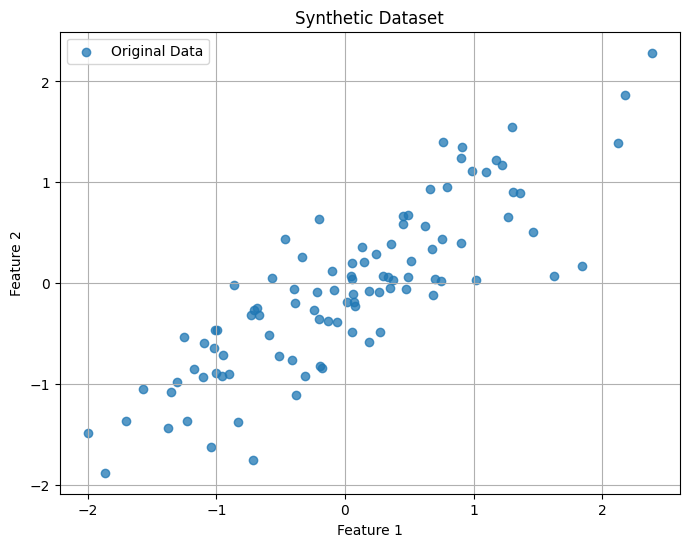

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', alpha=0.75)
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

-   Apply PCA

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

-   Evaluate PCA

In [4]:
# Print the principal components
print("Principal Components:\n", pca.components_)

Principal Components:
 [[ 0.75710263  0.65329596]
 [-0.65329596  0.75710263]]


In [5]:
# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Print cumulative explained variance
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.92485706 0.07514294]
Cumulative Explained Variance: [0.92485706 1.        ]


-   Visualize the PCA results

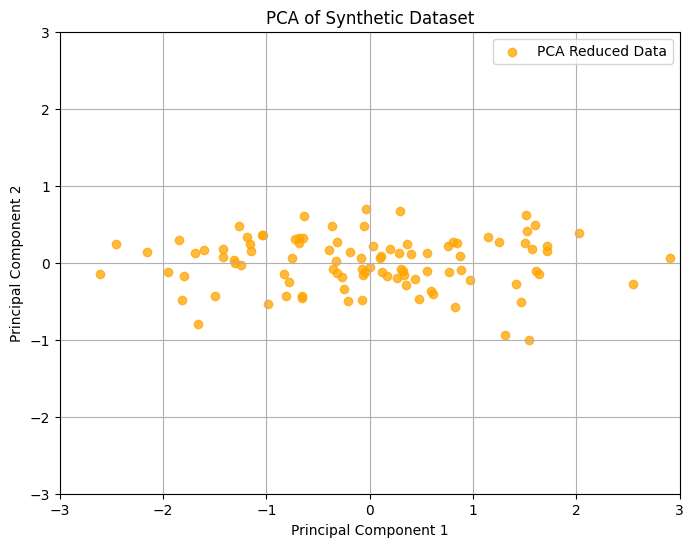

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='PCA Reduced Data', alpha=0.75, color='orange')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('PCA of Synthetic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

-   Visualize the explained variance ratio

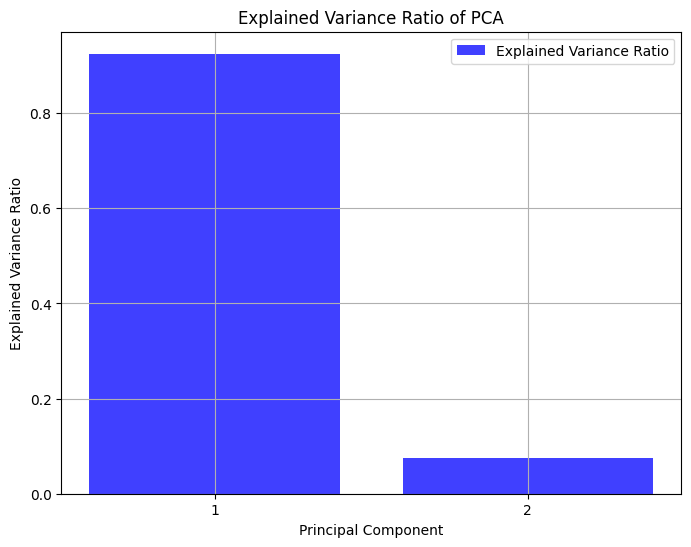

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1),
        pca.explained_variance_ratio_,
        alpha=0.75, color='blue',
        label='Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of PCA')
plt.xticks(range(1, pca.n_components_ + 1))
plt.legend()
plt.grid()
plt.show()

## Autoencoders

Autoencoders are a type of neural network used for unsupervised learning, particularly for dimensionality reduction and feature extraction. They consist of two main components: an encoder and a decoder. The encoder compresses the input data into a lower-dimensional representation (latent space), while the decoder reconstructs the original data from this representation.

Autoencoders can learn complex, non-linear mappings and are particularly useful for high-dimensional data. They can be trained using backpropagation to minimize the reconstruction error, which is the difference between the original input and the reconstructed output.

Autoencoders can be used for various tasks, including:

-   Dimensionality reduction: By training the autoencoder to compress the input data into a lower-dimensional representation, we can effectively reduce the dimensionality of the data while retaining important features.
-   Feature extraction: The latent space representation learned by the encoder can be used as a new set of features for downstream tasks, such as classification or clustering.
-   Denoising: Denoising autoencoders can be trained to reconstruct the original data from noisy inputs, effectively learning to filter out noise and retain important features.

### Mathematical Formulation

Autoencoders can be mathematically formulated as follows:

1.  **Encoder**: The encoder maps the input data $X \in \mathbb{R}^{n \times p}$ to a lower-dimensional representation $Z \in \mathbb{R}^{n \times k}$ using a function $f$: $$Z = f(X) = \sigma(W_e X + b_e),$$ where $W_e$ is the weight matrix, $b_e$ is the bias vector, and $\sigma$ is an activation function (e.g., ReLU, sigmoid).
2.  **Decoder**: The decoder reconstructs the original data from the lower-dimensional representation $Z$ using a function $g$: $$\hat{X} = g(Z) = \sigma(W_d Z + b_d),$$ where $W_d$ is the weight matrix, $b_d$ is the bias vector, and $\sigma$ is an activation function.
3.  **Loss Function**: The autoencoder is trained to minimize the reconstruction error, which can be defined as the mean squared error (MSE) between the original input $X$ and the reconstructed output $\hat{X}$: $$\mathcal{L}(X, \hat{X}) = \frac{1}{n} \sum_{i=1}^{n} \|X_i - \hat{X}_i\|^2,$$ where $X_i$ and $\hat{X}_i$ are the $i$-th samples of the original input and reconstructed output, respectively.

### Advantages and Disadvantages

-   **Advantages**:
    -   Can learn complex, non-linear mappings.
    -   Effective for high-dimensional data.
    -   Can be used for various tasks, including dimensionality reduction, feature extraction, and denoising.
-   **Disadvantages**:
    -   Requires a large amount of data for training.
    -   Can be computationally expensive, especially for deep autoencoders.
    -   May suffer from overfitting if not properly regularized.

### Evaluation of Autoencoders

To evaluate the effectiveness of autoencoders, we can use the reconstruction error as a metric. A lower reconstruction error indicates that the autoencoder has effectively learned to compress and reconstruct the input data. Additionally, we can visualize the latent space representation learned by the encoder to assess how well it captures the structure of the data.

## Hands-on Exercises

Use a synthetic dataset with 4 highly correlated features and apply PCA to reduce the dimensionality to 2 dimensions. Visualize the results and evaluate the explained variance ratio.

-   Generate a synthetic dataset with 4 features

In [8]:
import numpy as np
# Create a synthetic dataset with 4 features
np.random.seed(42)
X = np.random.rand(100, 4)  # 100 samples, 4 features
# Introduce high correlation between features
X[:, 1] = X[:, 0] + np.random.normal(0, 0.1, 100)  # Feature 2 is correlated with Feature 1
X[:, 2] = X[:, 1] + np.random.normal(0, 0.1, 100)  # Feature 3 is correlated with Feature 2
X[:, 3] = X[:, 2] + np.random.normal(0, 0.1, 100)  # Feature 4 is correlated with Feature 3
# Create a DataFrame for better visualization
import pandas as pd
feature_names = [f'Feature {i+1}' for i in range(4)]
df = pd.DataFrame(X, columns=feature_names)
print(df.head())

   Feature 1  Feature 2  Feature 3  Feature 4
0   0.374540   0.505088   0.538319   0.480642
1   0.156019   0.158119   0.083270   0.158809
2   0.601115   0.669310   0.824426   0.874517
3   0.832443   0.801416   0.812983   0.715228
4   0.304242   0.336659   0.454589   0.464522


-   Visualize the correlations between features

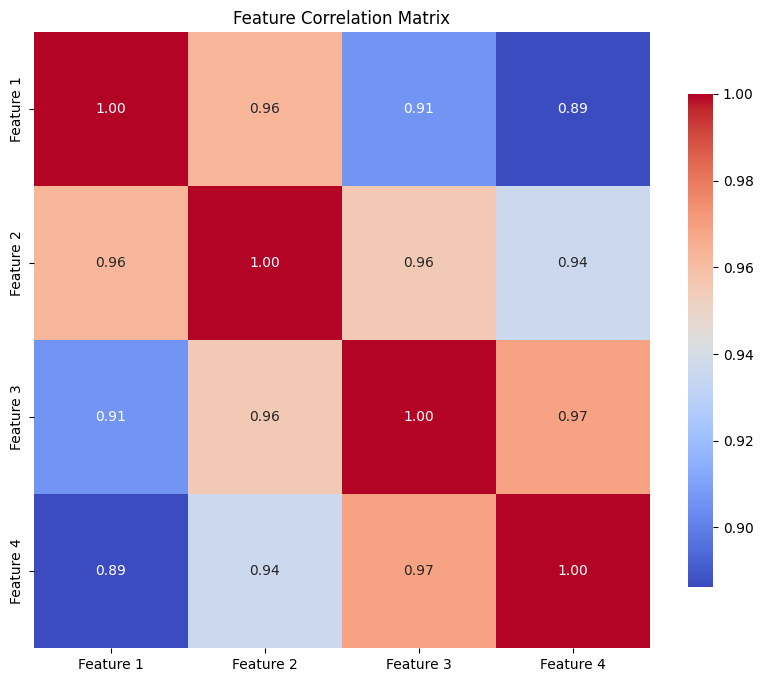

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.show()

-   Apply PCA with 4 components and visualize the results (first 2 PCs)

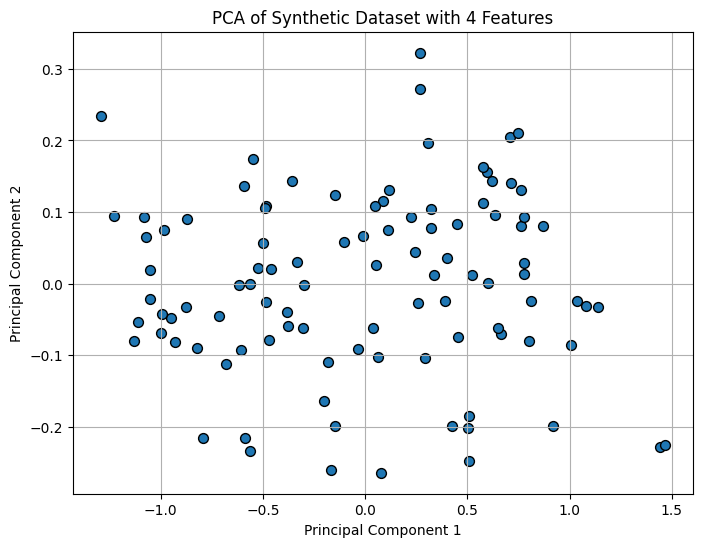

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50)
plt.title('PCA of Synthetic Dataset with 4 Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

-   Print the principal components and explained variance ratio

In [11]:
# Print the principal components
print("Principal Components:\n", pca.components_)

Principal Components:
 [[ 0.43388756  0.48467323  0.5186208   0.55485666]
 [ 0.6954338   0.33780634 -0.29920899 -0.55922508]
 [-0.30317307  0.22769328  0.69475196 -0.61119684]
 [-0.48600361  0.77403779 -0.39853     0.07641877]]


In [12]:
# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Print cumulative explained variance
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.95355226 0.03281419 0.00854854 0.00508501]
Cumulative Explained Variance: [0.95355226 0.98636645 0.99491499 1.        ]


-   Make a scree plot to visualize the explained variance

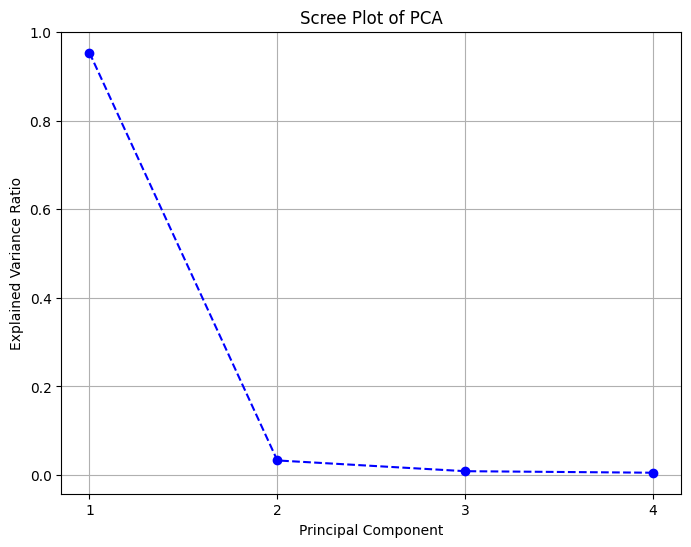

In [13]:
# Scree plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='blue')
plt.title('Scree Plot of PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid()
plt.show()

-   Visualize the correlation between the principal components

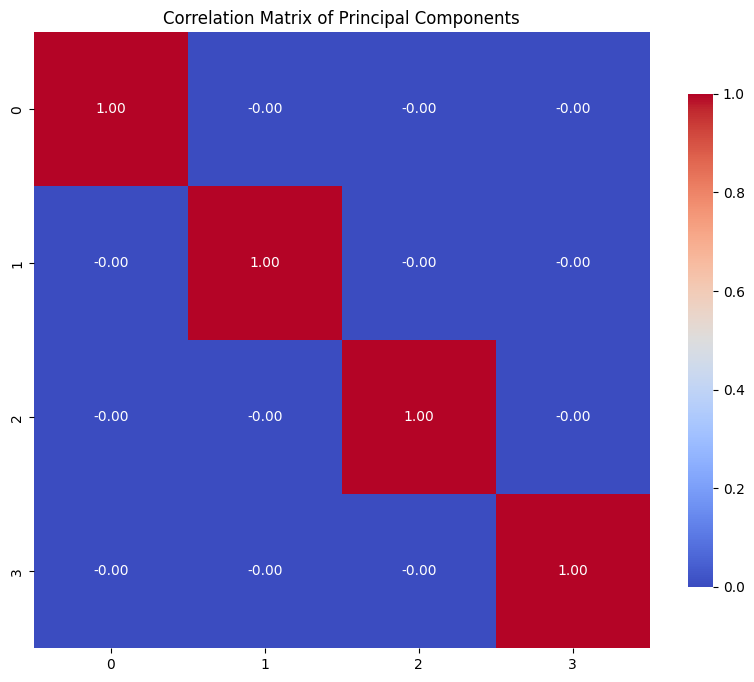

In [14]:
# Visualize the correlation between the principal components
plt.figure(figsize=(10, 8))
sns.heatmap(np.corrcoef(X_pca.T), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Principal Components')
plt.show()